In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load data from csv 
trial1_results = pd.read_csv('SVR_WithTime_Offset_4_Trial_1.csv', header=0)
trial2_results = pd.read_csv('SVR_WithTime_Offset_4_Trial_2.csv', header=0)
trial3_results = pd.read_csv('SVR_WithTime_Offset_4_Trial_3.csv', header=0)

In [3]:
trial1_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.8321,0.0
1,2.0,0.0,9.6658,1000.0
2,3.0,0.0,8.4172,2000.0
3,4.0,0.0,8.6319,3000.0
4,5.0,0.0,6.2580,4000.0
...,...,...,...,...
3001,3002.0,1.0,8.9919,368600.0
3002,3003.0,1.0,6.6615,369500.0
3003,3004.0,1.0,6.9792,370400.0
3004,3005.0,1.0,6.2634,371300.0


In [4]:
trial2_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.8321,0.0
1,2.0,1.0,9.7381,900.0
2,3.0,2.0,8.4907,1700.0
3,4.0,2.0,8.7030,2500.0
4,5.0,2.0,8.5176,3300.0
...,...,...,...,...
3001,3002.0,0.0,10.6794,406600.0
3002,3003.0,0.0,8.8719,407600.0
3003,3004.0,1.0,7.7555,408500.0
3004,3005.0,2.0,7.2257,409300.0


In [5]:
trial3_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.8321,0.0
1,2.0,0.0,9.6658,1000.0
2,3.0,0.0,8.4172,2000.0
3,4.0,0.0,8.6319,3000.0
4,5.0,1.0,7.4247,3900.0
...,...,...,...,...
3001,3002.0,2.0,7.1643,395500.0
3002,3003.0,3.0,0.8989,396000.0
3003,3004.0,7.0,0.8989,395500.0
3004,3005.0,7.0,0.8989,395000.0


## Analyse per timestep rewards

In [6]:
timeStop = 3000

In [7]:
trial1_rewards = trial1_results['Cummulative Reward'].tolist()
trial1_rewards = trial1_rewards[:timeStop]

In [8]:
trial2_rewards = trial2_results['Cummulative Reward'].tolist()
trial2_rewards = trial2_rewards[:timeStop]

In [9]:
trial3_rewards = trial3_results['Cummulative Reward'].tolist()
trial3_rewards = trial3_rewards[:timeStop]

In [10]:
data = {'Trial 1': trial1_rewards, 'Trial 2': trial2_rewards, 'Trial 3': trial3_rewards}
rewards_DF = pd.DataFrame(data=data)
rewards_DF

,Trial 1,Trial 2,Trial 3
0,0.0,0.0,0.0
1,1000.0,900.0,1000.0
2,2000.0,1700.0,2000.0
3,3000.0,2500.0,3000.0
4,4000.0,3300.0,3900.0
...,...,...,...
2995,365800.0,406600.0,392900.0
2996,366800.0,406100.0,393800.0
2997,367700.0,405600.0,393300.0
2998,367200.0,405100.0,392800.0


In [11]:
rewards_DF['mean'] = rewards_DF.mean(axis=1)
rewards_DF

,Trial 1,Trial 2,Trial 3,mean
0,0.0,0.0,0.0,0.000000
1,1000.0,900.0,1000.0,966.666667
2,2000.0,1700.0,2000.0,1900.000000
3,3000.0,2500.0,3000.0,2833.333333
4,4000.0,3300.0,3900.0,3733.333333
...,...,...,...,...
2995,365800.0,406600.0,392900.0,388433.333333
2996,366800.0,406100.0,393800.0,388900.000000
2997,367700.0,405600.0,393300.0,388866.666667
2998,367200.0,405100.0,392800.0,388366.666667


In [12]:
rewards_DF['Standard Deviation'] = rewards_DF[['Trial 1','Trial 2', 'Trial 3']].std(axis=1)
rewards_DF

,Trial 1,Trial 2,Trial 3,mean,Standard Deviation
0,0.0,0.0,0.0,0.000000,0.000000
1,1000.0,900.0,1000.0,966.666667,57.735027
2,2000.0,1700.0,2000.0,1900.000000,173.205081
3,3000.0,2500.0,3000.0,2833.333333,288.675135
4,4000.0,3300.0,3900.0,3733.333333,378.593890
...,...,...,...,...,...
2995,365800.0,406600.0,392900.0,388433.333333,20763.509658
2996,366800.0,406100.0,393800.0,388900.000000,20102.984853
2997,367700.0,405600.0,393300.0,388866.666667,19335.028661
2998,367200.0,405100.0,392800.0,388366.666667,19335.028661


In [13]:
rewards_upper = []
rewards_lower = []
for index, row in rewards_DF.iterrows():
    meanReward = row['mean']
    stdev = row['Standard Deviation']
    maxReward = meanReward + stdev
    rewards_upper.append(maxReward)
    minReward = meanReward - stdev
    rewards_lower.append(minReward)

In [14]:
rewards_mean = rewards_DF['mean'].tolist()
rewards_mean

[0.0,
 966.6666666666666,
 1900.0,
 2833.3333333333335,
 3733.3333333333335,
 4600.0,
 5366.666666666667,
 5733.333333333333,
 5233.333333333333,
 5633.333333333333,
 6500.0,
 7200.0,
 7900.0,
 8166.666666666667,
 8800.0,
 8766.666666666666,
 9600.0,
 10433.333333333334,
 11266.666666666666,
 12066.666666666666,
 12333.333333333334,
 12300.0,
 12700.0,
 13000.0,
 12966.666666666666,
 13800.0,
 14533.333333333334,
 14066.666666666666,
 13166.666666666666,
 12300.0,
 11900.0,
 12366.666666666666,
 12800.0,
 13700.0,
 14100.0,
 14966.666666666666,
 15800.0,
 16200.0,
 17066.666666666668,
 17800.0,
 18533.333333333332,
 17200.0,
 18166.666666666668,
 19066.666666666668,
 19933.333333333332,
 20200.0,
 20466.666666666668,
 20266.666666666668,
 20033.333333333332,
 19366.666666666668,
 19866.666666666668,
 20333.333333333332,
 20300.0,
 20766.666666666668,
 21200.0,
 21600.0,
 22466.666666666668,
 23233.333333333332,
 23533.333333333332,
 23833.333333333332,
 24300.0,
 24733.333333333332,
 2

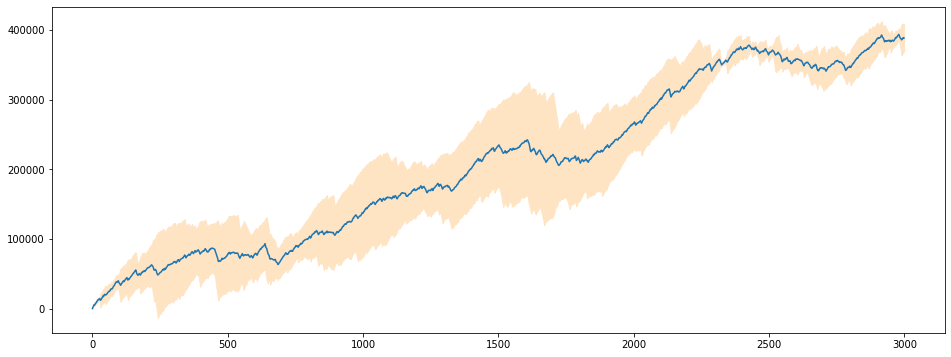

In [15]:
#plot graph 
x = [i for i in range(timeStop)]
plt.figure(figsize=(16, 6))
plt.plot(x, rewards_mean)
plt.fill_between(x, rewards_upper, rewards_lower, color='bisque')
plt.show()

## Analyse number of failure and maintenance instances

In [16]:
trial1_states = trial1_results['State'].tolist()
trial1_states = trial1_states[:3000]
trial1_states

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 2.0,
 6.0,
 1.0,
 1.0,
 2.0,
 2.0,
 6.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 3.0,
 7.0,
 7.0,
 7.0,
 7.0,
 2.0,
 2.0,
 2.0,
 2.0,
 6.0,
 1.0,
 1.0,
 2.0,
 2.0,
 6.0,
 1.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 8.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 6.0,
 6.0,
 1.0,
 2.0,
 2.0,
 6.0,
 1.0,
 1.0,
 2.0,
 3.0,
 3.0,
 7.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 7.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 6.0,
 6.0,
 1.0,
 2.0,
 2.0,
 2.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 6.0,
 1.0,
 5.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 5.0,
 5.0,
 5.0,
 5.0,
 0.0,
 1.0,
 2.0,
 2.0,
 2.0,
 6.0,
 6.0,
 1.0,
 1.0,
 2.0,
 3.0,
 7.0,
 2.0,
 2.0,
 3.0,
 3.0,
 8.0,
 8.0,
 0.0,
 0.0,
 0.0,
 1.0,
 2.0,
 6.0,
 6.0,
 1.0,
 1.0,
 1.0,
 2.0,
 3.0,
 3.0,
 7.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 7.0,
 2.0,
 2.0,
 3.0,
 3.0,
 8.0,
 8.0,
 8.0,
 8.0,
 0.0,
 1.0

In [17]:
def findNumEpisodes(stateList):
    previousState = stateList[0]
    currentState = stateList[0]
    endIndexes = []
    for order in range(len(stateList)):
        currentState = stateList[order]
        
        #check for failure
        if (currentState == 0) and (previousState > 7):
            endIndexes.append(order - 1)
            
        previousState = stateList[order]
    return len(endIndexes)

In [18]:
trial1_numEpisodes = findNumEpisodes(trial1_states)
trial1_numEpisodes

73

In [19]:
def findIndexesOfState(state, dataDF):
    stateIndexes = []
    for index, row in dataDF.iterrows():
        currentState = row['State']
        if currentState == state:
            timestep = row['Timestep']
            stateIndexes.append(timestep)
    return stateIndexes

In [20]:
trial1_results = trial1_results[:3000]
trial1_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.8321,0.0
1,2.0,0.0,9.6658,1000.0
2,3.0,0.0,8.4172,2000.0
3,4.0,0.0,8.6319,3000.0
4,5.0,0.0,6.2580,4000.0
...,...,...,...,...
2995,2996.0,0.0,6.9717,365800.0
2996,2997.0,0.0,6.6960,366800.0
2997,2998.0,1.0,5.4232,367700.0
2998,2999.0,5.0,5.4232,367200.0


In [21]:
trial1_state8_indexes = findIndexesOfState(8, trial1_results)
trial1_state8_indexes

[42.0,
 136.0,
 137.0,
 162.0,
 163.0,
 164.0,
 165.0,
 193.0,
 194.0,
 195.0,
 270.0,
 271.0,
 307.0,
 308.0,
 309.0,
 310.0,
 320.0,
 321.0,
 322.0,
 371.0,
 372.0,
 373.0,
 374.0,
 419.0,
 420.0,
 421.0,
 422.0,
 423.0,
 424.0,
 425.0,
 481.0,
 482.0,
 509.0,
 510.0,
 511.0,
 589.0,
 590.0,
 591.0,
 592.0,
 593.0,
 640.0,
 641.0,
 642.0,
 678.0,
 679.0,
 680.0,
 681.0,
 682.0,
 683.0,
 684.0,
 685.0,
 686.0,
 687.0,
 717.0,
 718.0,
 719.0,
 720.0,
 739.0,
 805.0,
 806.0,
 807.0,
 851.0,
 852.0,
 853.0,
 854.0,
 855.0,
 856.0,
 975.0,
 976.0,
 977.0,
 978.0,
 979.0,
 980.0,
 981.0,
 982.0,
 1069.0,
 1070.0,
 1071.0,
 1086.0,
 1114.0,
 1115.0,
 1159.0,
 1160.0,
 1161.0,
 1192.0,
 1193.0,
 1278.0,
 1279.0,
 1280.0,
 1281.0,
 1282.0,
 1288.0,
 1289.0,
 1290.0,
 1291.0,
 1292.0,
 1293.0,
 1294.0,
 1295.0,
 1434.0,
 1435.0,
 1436.0,
 1437.0,
 1438.0,
 1483.0,
 1484.0,
 1485.0,
 1486.0,
 1487.0,
 1527.0,
 1528.0,
 1529.0,
 1530.0,
 1557.0,
 1558.0,
 1559.0,
 1612.0,
 1632.0,
 1633.0,
 1634

In [22]:
def findNumInstancesInState(stateIndexes):
    previousIndex = stateIndexes[0]
    stateCount = 0
    for i in stateIndexes:
        if i - previousIndex > 1:
            stateCount += 1
        previousIndex = i
    return stateCount

In [23]:
trial1_state8_instanceCount = findNumInstancesInState(trial1_state8_indexes)
trial1_state8_instanceCount

49

In [24]:
#state 8

#trial1
trial1_results = trial1_results[:3000]
trial1_state8_indexes = findIndexesOfState(8, trial1_results)
trial1_state8_instanceCount = findNumInstancesInState(trial1_state8_indexes)
print("Number of instances in trial1 in state 8: %d" % trial1_state8_instanceCount)

#trial2
trial2_results = trial2_results[:3000]
trial2_state8_indexes = findIndexesOfState(8, trial2_results)
trial2_state8_instanceCount = findNumInstancesInState(trial2_state8_indexes)
print("Number of instances in trial2 in state 8: %d" % trial2_state8_instanceCount)

#trial3
trial3_results = trial3_results[:3000]
trial3_state8_indexes = findIndexesOfState(8, trial3_results)
trial3_state8_instanceCount = findNumInstancesInState(trial3_state8_indexes)
print("Number of instances in trial1 in state 8: %d" % trial3_state8_instanceCount)

average_state8_instanceCount = (trial1_state8_instanceCount + trial2_state8_instanceCount + trial3_state8_instanceCount)/3
print(f"Average number of instances in state 8: {average_state8_instanceCount}")

Number of instances in trial1 in state 8: 49
Number of instances in trial2 in state 8: 48
Number of instances in trial1 in state 8: 48
Average number of instances in state 8: 48.333333333333336


In [25]:
#state 9

#trial1
trial1_state9_indexes = findIndexesOfState(9, trial1_results)
trial1_state9_instanceCount = findNumInstancesInState(trial1_state9_indexes)
print("Number of instances in trial1 in state 9: %d" % trial1_state9_instanceCount)

#trial2
trial2_state9_indexes = findIndexesOfState(9, trial2_results)
trial2_state9_instanceCount = findNumInstancesInState(trial2_state9_indexes)
print("Number of instances in trial2 in state 9: %d" % trial2_state9_instanceCount)

#trial3
trial3_state9_indexes = findIndexesOfState(9, trial3_results)
trial3_state9_instanceCount = findNumInstancesInState(trial3_state9_indexes)
print("Number of instances in trial1 in state 9: %d" % trial3_state9_instanceCount)

average_state9_instanceCount = (trial1_state9_instanceCount + trial2_state9_instanceCount + trial3_state9_instanceCount)/3
print(f"Average number of instances in state 9: {average_state9_instanceCount}")

Number of instances in trial1 in state 9: 22
Number of instances in trial2 in state 9: 16
Number of instances in trial1 in state 9: 21
Average number of instances in state 9: 19.666666666666668


## Analyse percentage of time in each state

In [26]:
#state 0

#trial1
trial1_state0_indexes = findIndexesOfState(0, trial1_results)
trial1_state0_count = len(trial1_state0_indexes)
trial1_state0_percentage = trial1_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (0, trial1_state0_count, trial1_state0_percentage))

#trial2
trial2_state0_indexes = findIndexesOfState(0, trial2_results)
trial2_state0_count = len(trial2_state0_indexes)
trial2_state0_percentage = trial2_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (0, trial2_state0_count, trial2_state0_percentage))

#trial3
trial3_state0_indexes = findIndexesOfState(0, trial3_results)
trial3_state0_count = len(trial3_state0_indexes)
trial3_state0_percentage = trial3_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (0, trial3_state0_count, trial3_state0_percentage))

#average 
average_state0_count = (trial1_state0_count + trial2_state0_count + trial3_state0_count)/3
average_state0_percentage = average_state0_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (0, average_state0_count, average_state0_percentage))

Machine is in state 0 for 420 timesteps 0.1400 percentage of time in trial 1
Machine is in state 0 for 448 timesteps 0.1493 percentage of time in trial 2
Machine is in state 0 for 467 timesteps 0.1557 percentage of time in trial 3
Machine is in state 0 for 445.0000 timesteps 0.1483 percentage of time on average


In [27]:
#state 1

#trial1
trial1_state1_indexes = findIndexesOfState(1, trial1_results)
trial1_state1_count = len(trial1_state1_indexes)
trial1_state1_percentage = trial1_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (1, trial1_state1_count, trial1_state1_percentage))

#trial2
trial2_state1_indexes = findIndexesOfState(1, trial2_results)
trial2_state1_count = len(trial2_state1_indexes)
trial2_state1_percentage = trial2_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (1, trial2_state1_count, trial2_state1_percentage))

#trial3
trial3_state1_indexes = findIndexesOfState(1, trial3_results)
trial3_state1_count = len(trial3_state1_indexes)
trial3_state1_percentage = trial3_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (1, trial3_state1_count, trial3_state1_percentage))

#average 
average_state1_count = (trial1_state1_count + trial2_state1_count + trial3_state1_count)/3
average_state1_percentage = average_state1_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (1, average_state1_count, average_state1_percentage))

Machine is in state 1 for 591 timesteps 0.1970 percentage of time in trial 1
Machine is in state 1 for 583 timesteps 0.1943 percentage of time in trial 2
Machine is in state 1 for 563 timesteps 0.1877 percentage of time in trial 3
Machine is in state 1 for 579.0000 timesteps 0.1930 percentage of time on average


In [28]:
#state 2

#trial1
trial1_state2_indexes = findIndexesOfState(2, trial1_results)
trial1_state2_count = len(trial1_state2_indexes)
trial1_state2_percentage = trial1_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (2, trial1_state2_count, trial1_state2_percentage))

#trial2
trial2_state2_indexes = findIndexesOfState(2, trial2_results)
trial2_state2_count = len(trial2_state2_indexes)
trial2_state2_percentage = trial2_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (2, trial2_state2_count, trial2_state2_percentage))

#trial3
trial3_state2_indexes = findIndexesOfState(2, trial3_results)
trial3_state2_count = len(trial3_state2_indexes)
trial3_state2_percentage = trial3_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (2, trial3_state2_count, trial3_state2_percentage))

#average 
average_state2_count = (trial1_state2_count + trial2_state2_count + trial3_state2_count)/3
average_state2_percentage = average_state2_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (2, average_state2_count, average_state2_percentage))

Machine is in state 2 for 631 timesteps 0.2103 percentage of time in trial 1
Machine is in state 2 for 633 timesteps 0.2110 percentage of time in trial 2
Machine is in state 2 for 612 timesteps 0.2040 percentage of time in trial 3
Machine is in state 2 for 625.3333 timesteps 0.2084 percentage of time on average


In [29]:
#state 3

#trial1
trial1_state3_indexes = findIndexesOfState(3, trial1_results)
trial1_state3_count = len(trial1_state3_indexes)
trial1_state3_percentage = trial1_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (3, trial1_state3_count, trial1_state3_percentage))

#trial2
trial2_state3_indexes = findIndexesOfState(3, trial2_results)
trial2_state3_count = len(trial2_state3_indexes)
trial2_state3_percentage = trial2_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (3, trial2_state3_count, trial2_state3_percentage))

#trial3
trial3_state3_indexes = findIndexesOfState(3, trial3_results)
trial3_state3_count = len(trial3_state3_indexes)
trial3_state3_percentage = trial3_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (3, trial3_state3_count, trial3_state3_percentage))

#average 
average_state3_count = (trial1_state3_count + trial2_state3_count + trial3_state3_count)/3
average_state3_percentage = average_state3_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (3, average_state3_count, average_state3_percentage))

Machine is in state 3 for 254 timesteps 0.0847 percentage of time in trial 1
Machine is in state 3 for 273 timesteps 0.0910 percentage of time in trial 2
Machine is in state 3 for 277 timesteps 0.0923 percentage of time in trial 3
Machine is in state 3 for 268.0000 timesteps 0.0893 percentage of time on average


In [30]:
#state 4

#trial1
trial1_state4_indexes = findIndexesOfState(4, trial1_results)
trial1_state4_count = len(trial1_state4_indexes)
trial1_state4_percentage = trial1_state4_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (4, trial1_state4_count, trial1_state4_percentage))

#trial2
trial2_state4_indexes = findIndexesOfState(4, trial2_results)
trial2_state4_count = len(trial2_state4_indexes)
trial2_state4_percentage = trial2_state4_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (4, trial2_state4_count, trial2_state4_percentage))

#trial3
trial3_state4_indexes = findIndexesOfState(4, trial3_results)
trial3_state4_count = len(trial3_state4_indexes)
trial3_state4_percentage = trial3_state4_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (4, trial3_state4_count, trial3_state4_percentage))

#average 
average_state4_count = (trial1_state4_count + trial2_state4_count + trial3_state4_count)/3
average_state4_percentage = average_state4_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (4, average_state4_count, average_state4_percentage))

Machine is in state 4 for 43 timesteps 0.0143 percentage of time in trial 1
Machine is in state 4 for 61 timesteps 0.0203 percentage of time in trial 2
Machine is in state 4 for 69 timesteps 0.0230 percentage of time in trial 3
Machine is in state 4 for 57.6667 timesteps 0.0192 percentage of time on average


In [31]:
#state 5

#trial1
trial1_state5_indexes = findIndexesOfState(5, trial1_results)
trial1_state5_count = len(trial1_state5_indexes)
trial1_state5_percentage = trial1_state5_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (5, trial1_state5_count, trial1_state5_percentage))

#trial2
trial2_state5_indexes = findIndexesOfState(5, trial2_results)
trial2_state5_count = len(trial2_state5_indexes)
trial2_state5_percentage = trial2_state5_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (5, trial2_state5_count, trial2_state5_percentage))

#trial3
trial3_state5_indexes = findIndexesOfState(5, trial3_results)
trial3_state5_count = len(trial3_state5_indexes)
trial3_state5_percentage = trial3_state5_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (5, trial3_state5_count, trial3_state5_percentage))

#average 
average_state5_count = (trial1_state5_count + trial2_state5_count + trial3_state5_count)/3
average_state5_percentage = average_state5_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (5, average_state5_count, average_state5_percentage))

Machine is in state 5 for 151 timesteps 0.0503 percentage of time in trial 1
Machine is in state 5 for 160 timesteps 0.0533 percentage of time in trial 2
Machine is in state 5 for 138 timesteps 0.0460 percentage of time in trial 3
Machine is in state 5 for 149.6667 timesteps 0.0499 percentage of time on average


In [32]:
#state 6

#trial1
trial1_state6_indexes = findIndexesOfState(6, trial1_results)
trial1_state6_count = len(trial1_state6_indexes)
trial1_state6_percentage = trial1_state6_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (6, trial1_state6_count, trial1_state6_percentage))

#trial2
trial2_state6_indexes = findIndexesOfState(6, trial2_results)
trial2_state6_count = len(trial2_state6_indexes)
trial2_state6_percentage = trial2_state6_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (6, trial2_state6_count, trial2_state6_percentage))

#trial3
trial3_state6_indexes = findIndexesOfState(6, trial3_results)
trial3_state6_count = len(trial3_state6_indexes)
trial3_state6_percentage = trial3_state6_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (6, trial3_state6_count, trial3_state6_percentage))

#average 
average_state6_count = (trial1_state6_count + trial2_state6_count + trial3_state6_count)/3
average_state6_percentage = average_state6_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (6, average_state6_count, average_state6_percentage))

Machine is in state 6 for 238 timesteps 0.0793 percentage of time in trial 1
Machine is in state 6 for 235 timesteps 0.0783 percentage of time in trial 2
Machine is in state 6 for 200 timesteps 0.0667 percentage of time in trial 3
Machine is in state 6 for 224.3333 timesteps 0.0748 percentage of time on average


In [33]:
#state 7

#trial1
trial1_state7_indexes = findIndexesOfState(7, trial1_results)
trial1_state7_count = len(trial1_state7_indexes)
trial1_state7_percentage = trial1_state7_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (7, trial1_state7_count, trial1_state7_percentage))

#trial2
trial2_state7_indexes = findIndexesOfState(7, trial2_results)
trial2_state7_count = len(trial2_state7_indexes)
trial2_state7_percentage = trial2_state7_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (7, trial2_state7_count, trial2_state7_percentage))

#trial3
trial3_state7_indexes = findIndexesOfState(7, trial3_results)
trial3_state7_count = len(trial3_state7_indexes)
trial3_state7_percentage = trial3_state7_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (7, trial3_state7_count, trial3_state7_percentage))

#average 
average_state7_count = (trial1_state7_count + trial2_state7_count + trial3_state7_count)/3
average_state7_percentage = average_state7_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (7, average_state7_count, average_state7_percentage))

Machine is in state 7 for 224 timesteps 0.0747 percentage of time in trial 1
Machine is in state 7 for 238 timesteps 0.0793 percentage of time in trial 2
Machine is in state 7 for 249 timesteps 0.0830 percentage of time in trial 3
Machine is in state 7 for 237.0000 timesteps 0.0790 percentage of time on average


In [34]:
#state 8

#trial1
trial1_state8_indexes = findIndexesOfState(8, trial1_results)
trial1_state8_count = len(trial1_state8_indexes)
trial1_state8_percentage = trial1_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (8, trial1_state8_count, trial1_state8_percentage))

#trial2
trial2_state8_indexes = findIndexesOfState(8, trial2_results)
trial2_state8_count = len(trial2_state8_indexes)
trial2_state8_percentage = trial2_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (8, trial2_state8_count, trial2_state8_percentage))

#trial3
trial3_state8_indexes = findIndexesOfState(8, trial3_results)
trial3_state8_count = len(trial3_state8_indexes)
trial3_state8_percentage = trial3_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (8, trial3_state8_count, trial3_state8_percentage))

#average 
average_state8_count = (trial1_state8_count + trial2_state8_count + trial3_state8_count)/3
average_state8_percentage = average_state8_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (8, average_state8_count, average_state8_percentage))

Machine is in state 8 for 220 timesteps 0.0733 percentage of time in trial 1
Machine is in state 8 for 247 timesteps 0.0823 percentage of time in trial 2
Machine is in state 8 for 227 timesteps 0.0757 percentage of time in trial 3
Machine is in state 8 for 231.3333 timesteps 0.0771 percentage of time on average


In [35]:
#state 9

#trial1
trial1_state9_indexes = findIndexesOfState(9, trial1_results)
trial1_state9_count = len(trial1_state9_indexes)
trial1_state9_percentage = trial1_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (9, trial1_state9_count, trial1_state9_percentage))

#trial2
trial2_state9_indexes = findIndexesOfState(9, trial2_results)
trial2_state9_count = len(trial2_state9_indexes)
trial2_state9_percentage = trial2_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (9, trial2_state9_count, trial2_state9_percentage))

#trial3
trial3_state9_indexes = findIndexesOfState(9, trial3_results)
trial3_state9_count = len(trial3_state9_indexes)
trial3_state9_percentage = trial3_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (9, trial3_state9_count, trial3_state9_percentage))

#average 
average_state9_count = (trial1_state9_count + trial2_state9_count + trial3_state9_count)/3
average_state9_percentage = average_state9_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (9, average_state9_count, average_state9_percentage))

Machine is in state 9 for 228 timesteps 0.0760 percentage of time in trial 1
Machine is in state 9 for 122 timesteps 0.0407 percentage of time in trial 2
Machine is in state 9 for 198 timesteps 0.0660 percentage of time in trial 3
Machine is in state 9 for 182.6667 timesteps 0.0609 percentage of time on average
